#### 1. Importing Libraries

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error


In [ ]:
#### 2. Loading the data
data = pd.read_csv('BostonHousing.csv')


#### 2.5 Proccessing data
data.drop(columns=['chas','zn','rad'],inplace=True)
data_corr = data.corr()
data_corr[-1:]


#### 3. Splitting the data
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1:],test_size=0.25,random_state=42)


In [77]:
#### 4. Implementing the model
model = DecisionTreeRegressor(criterion='squared_error',splitter='best',min_samples_split=25,random_state=42)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_predict)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

RMSE: 3.0090894854011694


[Text(0.630859375, 0.9666666666666667, 'x[3] <= 6.941\nsquared_error = 88.682\nsamples = 379\nvalue = 22.908'),
 Text(0.38671875, 0.9, 'x[9] <= 14.4\nsquared_error = 40.363\nsamples = 314\nvalue = 19.954'),
 Text(0.5087890625, 0.9333333333333333, 'True  '),
 Text(0.2421875, 0.8333333333333334, 'x[5] <= 1.385\nsquared_error = 26.28\nsamples = 187\nvalue = 23.394'),
 Text(0.2109375, 0.7666666666666667, 'squared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.2734375, 0.7666666666666667, 'x[3] <= 6.543\nsquared_error = 14.927\nsamples = 183\nvalue = 22.933'),
 Text(0.171875, 0.7, 'x[9] <= 7.76\nsquared_error = 7.45\nsamples = 140\nvalue = 21.531'),
 Text(0.0625, 0.6333333333333333, 'x[6] <= 222.5\nsquared_error = 2.214\nsamples = 27\nvalue = 23.685'),
 Text(0.03125, 0.5666666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(0.09375, 0.5666666666666667, 'x[8] <= 346.405\nsquared_error = 1.295\nsamples = 26\nvalue = 23.492'),
 Text(0.0625, 0.5, 'squared_error = 0.0\

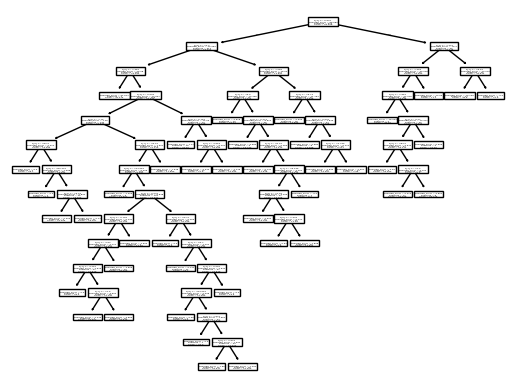

In [78]:
plot_tree(model)

In [79]:
model.feature_importances_


#### 5. Using GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
    'max_depth': [5, 10, 15, 20, 25],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 15]
}

grid_search=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error', n_jobs=3,cv=3,verbose=0)

grid_search.fit(x_train,y_train)
best_model = grid_search.best_estimator_

c:\Users\Usuario\Documents\Proyectos\Training\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
960 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\Documents\Proyectos\Training\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\Documents\Proyectos\Training\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Usuario\Documents\Proyectos\Training\Lib\site-packages\sklearn\base.py", line 666, in _validate_params

In [80]:
best_model


DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='sqrt',
                      min_samples_leaf=4, random_state=42)

[Text(0.6098958333333333, 0.9545454545454546, 'x[2] <= 0.669\npoisson = 1.828\nsamples = 379\nvalue = 22.908'),
 Text(0.378125, 0.8636363636363636, 'x[3] <= 6.676\npoisson = 1.461\nsamples = 302\nvalue = 25.181'),
 Text(0.4940104166666667, 0.9090909090909092, 'True  '),
 Text(0.20625, 0.7727272727272727, 'x[9] <= 14.4\npoisson = 0.537\nsamples = 215\nvalue = 21.029'),
 Text(0.12916666666666668, 0.6818181818181818, 'x[3] <= 6.543\npoisson = 0.405\nsamples = 151\nvalue = 22.637'),
 Text(0.07916666666666666, 0.5909090909090909, 'x[3] <= 5.628\npoisson = 0.385\nsamples = 131\nvalue = 22.053'),
 Text(0.0625, 0.5, 'poisson = 1.832\nsamples = 6\nvalue = 27.717'),
 Text(0.09583333333333334, 0.5, 'x[5] <= 1.875\npoisson = 0.282\nsamples = 125\nvalue = 21.782'),
 Text(0.07916666666666666, 0.4090909090909091, 'poisson = 2.705\nsamples = 4\nvalue = 29.075'),
 Text(0.1125, 0.4090909090909091, 'x[9] <= 7.76\npoisson = 0.164\nsamples = 121\nvalue = 21.54'),
 Text(0.03333333333333333, 0.31818181818181

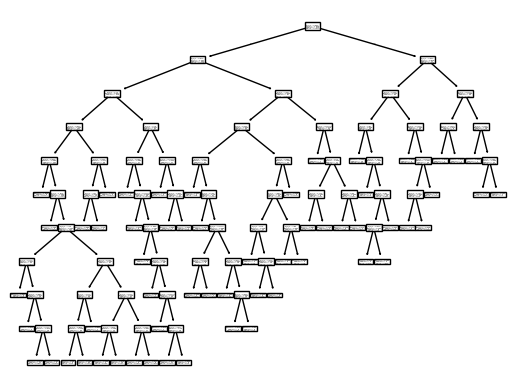

In [81]:
plot_tree(best_model)

In [82]:
best_model.fit(x_train,y_train)
y_predict_2 = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_predict_2)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

RMSE: 3.7962104577268403
